
## Titanic Survival Exploration

In 1912, the ship RMS Titanic struck an iceberg on its maiden voyage and sank, resulting in the deaths of most of its passengers and crew. In this project, I will explore a subset of the RMS Titanic passenger manifest to determine which features best predict whether someone survived or did not survive. 

In [1]:
# Importing libraries necessary for this project
import numpy as np
import pandas as pd
from IPython.display import display # Allows the use of display() for DataFrames

# Importing supplementary visualizations code visuals.py
import visuals as vs

# Pretty display for notebooks
%matplotlib inline

# Loading the dataset
in_file = 'titanic_data.csv'
full_data = pd.read_csv(in_file)

# Printing the first few entries of the RMS Titanic data
display(full_data.head())

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


From a sample of the RMS Titanic data, we can see the various features present for each passenger on the ship:
- **Survived**: Outcome of survival (0 = No; 1 = Yes)
- **Pclass**: Socio-economic class (1 = Upper class; 2 = Middle class; 3 = Lower class)
- **Name**: Name of passenger
- **Sex**: Sex of the passenger
- **Age**: Age of the passenger (Some entries contain `NaN`)
- **SibSp**: Number of siblings and spouses of the passenger aboard
- **Parch**: Number of parents and children of the passenger aboard
- **Ticket**: Ticket number of the passenger
- **Fare**: Fare paid by the passenger
- **Cabin** Cabin number of the passenger (Some entries contain `NaN`)
- **Embarked**: Port of embarkation of the passenger (C = Cherbourg; Q = Queenstown; S = Southampton)

Since we're interested in the outcome of survival for each passenger or crew member, we can remove the **Survived** feature from this dataset and store it as its own separate variable `outcomes`. We will use these outcomes as our prediction targets.  
Run the code cell below to remove **Survived** as a feature of the dataset and store it in `outcomes`.

In [2]:
# Storing the 'Survived' feature in a new variable and remove it from the dataset
outcomes = full_data['Survived']
data = full_data.drop('Survived', axis = 1)

display(data.head())

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


The very same sample of the RMS Titanic data now shows the **Survived** feature removed from the DataFrame. Note that `data` (the passenger data) and `outcomes` (the outcomes of survival) are now *paired*. That means for any passenger `data.loc[i]`, they have the survival outcome `outcomes[i]`.

To measure the performance of our predictions, we are using **accuracy** as metric.


In [3]:
def accuracy_score(truth, pred):
    """ Returns accuracy score for input truth and predictions. """
    
    if len(truth) == len(pred): 
        
        return "Predictions have an accuracy of {:.2f}%.".format((truth == pred).mean()*100)
    
    else:
        return "Number of predictions does not match number of outcomes!"
    
predictions = pd.Series(np.ones(5, dtype = int))
print(accuracy_score(outcomes[:5], predictions))

Predictions have an accuracy of 60.00%.




# Making Predictions

If we were asked to make a prediction about any passenger aboard the RMS Titanic whom we knew nothing about, then the best prediction we could make would be that they did not survive. This is because we can assume that a majority of the passengers (more than 50%) did not survive the ship sinking.  


In [4]:
def predictions_0(data):
    """ Model with no features. Always predicts a passenger did not survive. """

    predictions = []
    for _, passenger in data.iterrows():
        
        predictions.append(0)
    
    return pd.Series(predictions)

predictions = predictions_0(data)


* Using the above prediction we have to check how accurate we are in finding the outcome.



In [5]:
print(accuracy_score(outcomes, predictions))

Predictions have an accuracy of 61.62%.



Let's take a look at whether the feature **Sex** has any indication of survival rates among passengers using the `survival_stats` function.

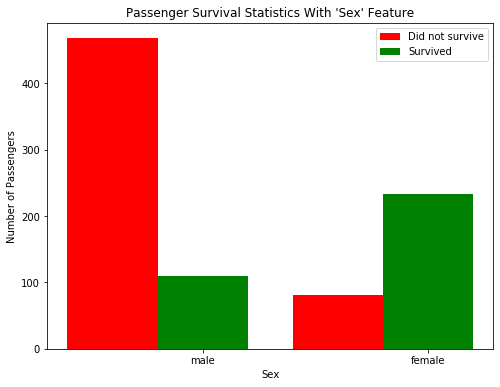

In [6]:
vs.survival_stats(data, outcomes, 'Sex')

Examining the survival statistics, a large majority of males did not survive the ship sinking. However, a majority of females *did* survive the ship sinking. Let's build on our previous prediction: If a passenger was female, then we will predict that they survived. Otherwise, we will predict the passenger did not survive.  


In [7]:
def predictions_1(data):
    """ Model with one feature: 
            - Predict a passenger survived if they are female. """
    
    predictions = []
    for _, passenger in data.iterrows():
        
        if passenger['Sex'] == 'female':
            predictions.append(1)
        else:
            predictions.append(0)
    
    return pd.Series(predictions)

predictions = predictions_1(data)

In [8]:
print(accuracy_score(outcomes, predictions))

Predictions have an accuracy of 78.68%.


***
Using just the **Sex** feature for each passenger, we are able to increase the accuracy of our predictions by a significant margin. Now, let's consider using an additional feature to see if we can further improve our predictions. For example, consider all of the male passengers aboard the RMS Titanic: Can we find a subset of those passengers that had a higher rate of survival? Let's start by looking at the **Age** of each male, by again using the `survival_stats` function. This time, we'll use a fourth parameter to filter out the data so that only passengers with the **Sex** 'male' will be included.  


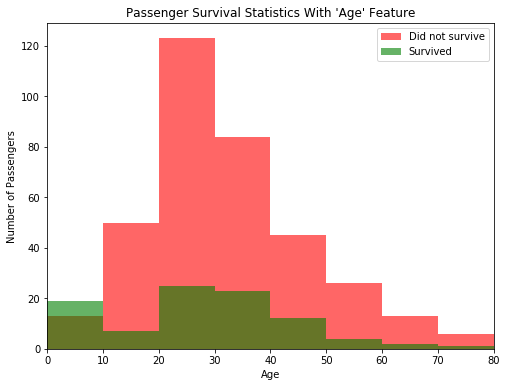

In [9]:
vs.survival_stats(data, outcomes, 'Age', ["Sex == 'male'"])

Examining the survival statistics, the majority of males younger than 10 survived the ship sinking, whereas most males age 10 or older *did not survive* the ship sinking. Let's continue to build on our previous prediction: If a passenger was female, then we will predict they survive. If a passenger was male and younger than 10, then we will also predict they survive. Otherwise, we will predict they do not survive.  

In [10]:
def predictions_2(data):
    """ Model with two features: 
            - Predict a passenger survived if they are female.
            - Predict a passenger survived if they are male and younger than 10. """
    
    predictions = []
    for _, passenger in data.iterrows():
        
        if passenger['Sex'] == 'female':
            predictions.append(1)
        else:
            if(passenger['Age']) < 10:
                predictions.append(1)
            else:
                predictions.append(0)
    
    return pd.Series(predictions)

predictions = predictions_2(data)

In [11]:
print(accuracy_score(outcomes, predictions))

Predictions have an accuracy of 79.35%.


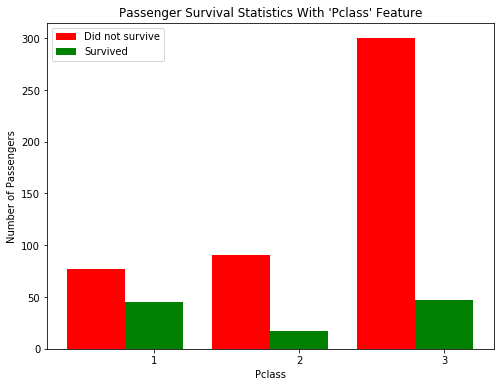

In [12]:
vs.survival_stats(data, outcomes, 'Pclass',["Sex == male",])

I thougt of exploring Pclass.
From the graph I started to assume that I could get more information from Pclass == 1, where the survival rate is more compared to others. So I started tweaking with Age and Pclass.

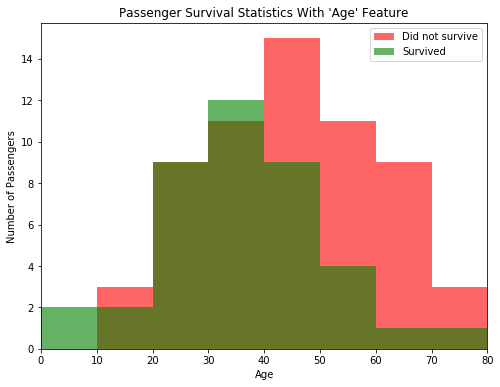

In [13]:
vs.survival_stats(data, outcomes, 'Age',["Sex == male","Pclass == 1"])

From this above graph I can clearly see that from the ages 20 to 40 the percentage of survival is more. So I started to add more features.

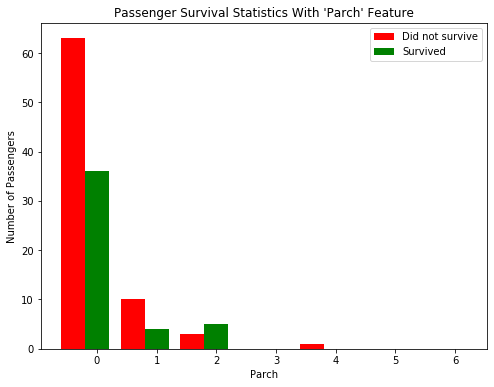

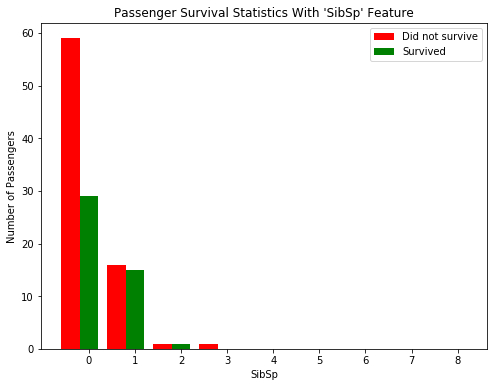

In [14]:
vs.survival_stats(data, outcomes, 'Parch',["Sex == male","Pclass == 1"])

vs.survival_stats(data, outcomes, 'SibSp',["Sex == male","Pclass == 1"])


From the first graph, I have seen that the more number of males survived in Parch = 0 in case of numbers while in Parch = 2, the survived outnumbered the did not survived.

From the second one, I have taken the SibSp for the 0,1 as the numbers look promising and would like to check the graphs

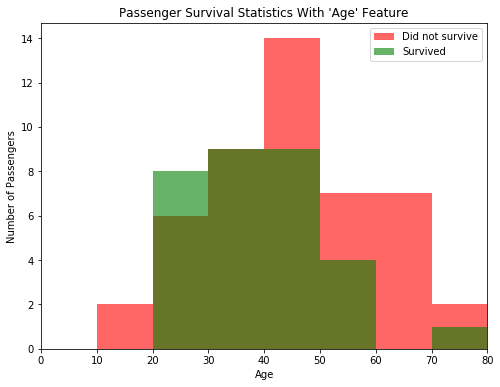

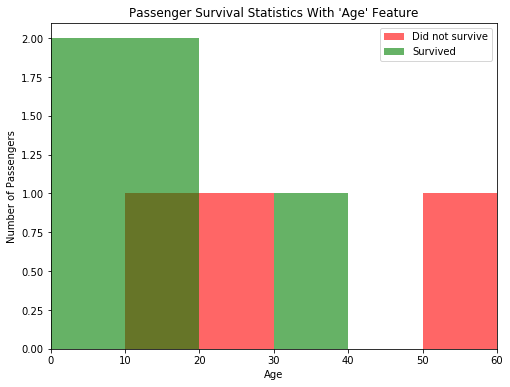

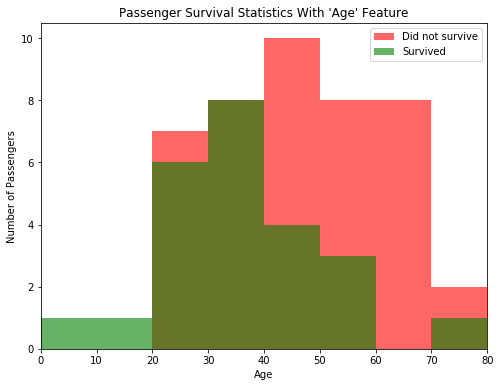

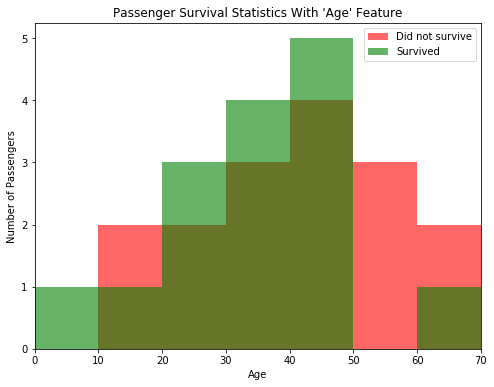

In [15]:
vs.survival_stats(data, outcomes, 'Age',["Sex == male","Pclass == 1", "Parch == 0"])
vs.survival_stats(data, outcomes, 'Age',["Sex == male","Pclass == 1", "Parch == 2"])
vs.survival_stats(data, outcomes, 'Age',["Sex == male","Pclass == 1", "SibSp == 0"])
vs.survival_stats(data, outcomes, 'Age',["Sex == male","Pclass == 1", "SibSp == 1"])

* From the above graphs I concluded that the males between 20 to 40 of parch 0 survived more.
* From the second one, the males below 20 and between 30 and 40 of parch 2 survived.
* From the third one, the males below 20 and having no siblings survived.
* From the last one, the men of age between 20 and 50 having 1 sibling survived.

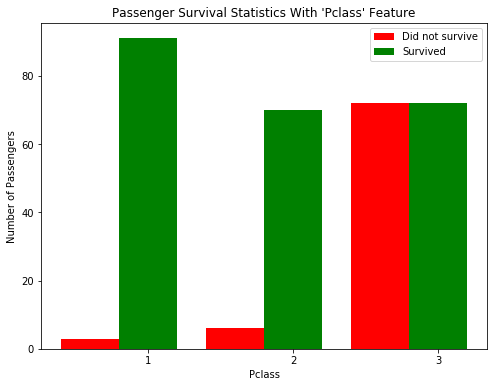

In [16]:
vs.survival_stats(data, outcomes, 'Pclass', ["Sex == female",])

From the data women of Pclass 1,2 survived with high percentage. So I thought of looking deep into the data to find the cases where the women died

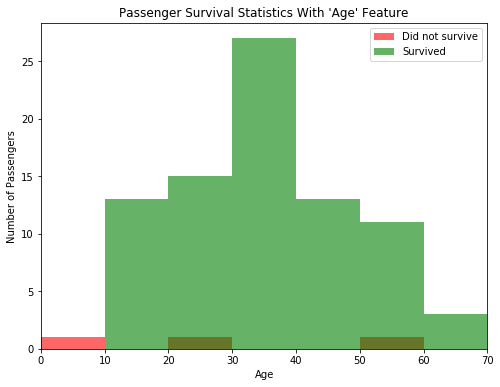

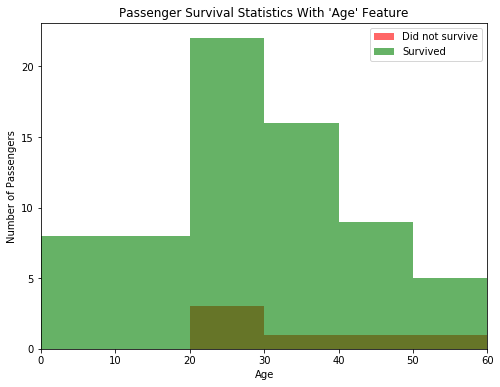

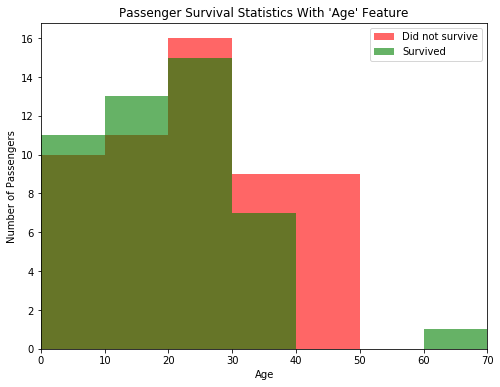

In [17]:
vs.survival_stats(data, outcomes, 'Age', ["Sex == female", "Pclass == 1"])
vs.survival_stats(data, outcomes, 'Age', ["Sex == female", "Pclass == 2"])
vs.survival_stats(data, outcomes, 'Age', ["Sex == female", "Pclass == 3"])


From the above graphs I inferred that:
* Women of age below 10 of Pclass 1 died certainly
* Women of age between 20 and 50 of Pclass 3 died with more probability

In [18]:
def predictions_3(data):
    """ Model with multiple features. Makes a prediction with an accuracy of at least 80%. """
    
    predictions = []
    for _, passenger in data.iterrows():
        
        if passenger['Sex'] == 'female':
            
            if passenger['Age'] > 20 and passenger['Age'] <50 and passenger['Pclass'] == 3:
                predictions.append(0)
            elif passenger['Age']<10 and passenger['Pclass'] == 1:
                predictions.append(0)
            else:
                predictions.append(1)
        else:
            
            if passenger['Pclass'] == 1 and passenger['Parch'] == 0 and passenger['Age'] > 20 and passenger['Age'] < 40:
                predictions.append(1)
            elif passenger['Pclass'] == 1 and passenger['Parch'] == 0 and passenger['Age'] > 30 and passenger['Age'] < 40 and passenger['Age'] < 20:
                predictions.append(1)
            elif passenger['Pclass'] == 1 and passenger['SibSp'] == 0 and passenger['Age'] < 20:
                predictions.append(1)
            elif passenger['Pclass'] == 1 and passenger['SibSp'] == 1 and passenger['Age'] > 20 and passenger['Age'] < 50: 
                predictions.append(1)
            elif passenger['Pclass'] == 1 and passenger["Parch"] == 2 and passenger['Embarked'] == 'S':
                predictions.append(1)
            elif passenger['Age'] < 10:
                predictions.append(1)
            
            else:
                predictions.append(0)
    
    return pd.Series(predictions)

predictions = predictions_3(data)

In [19]:
print(accuracy_score(outcomes, predictions))

Predictions have an accuracy of 81.26%.


My accuracy is 80.7%. At first I tested on male data. I chose Pclass attribute, and found some minor patterns where males survived. And then I added SibSp feature and tweaked a little bit and found some pattterns in it. They were so small. So I thought of finding patterns in female data where the most of the women are dead so I found it in Pclass attribute and it added up more percentage than others.


The approach I used is nothing but a series of decisions i.e., *decision tree*